In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

final_data.txt	   ProteinG_fig1.png  Q_unfolding_WE.txt  TIC12_WE.txt
Final_plots.ipynb  Q_MD.txt	      TIC12_MD.txt


In [3]:
df_ic_MD = pd.read_csv('TIC12_MD.txt', sep='\t')
df_ic_WE = pd.read_csv('TIC12_WE.txt', sep='\t')
df_Q_MD = pd.read_csv('Q_MD.txt', sep='\t')
df_Q_WE = pd.read_csv('Q_unfolding_WE.txt', sep='\t')
df_final = pd.read_csv('final_data.txt', sep='\t')

Text(500, 127, 'd)')

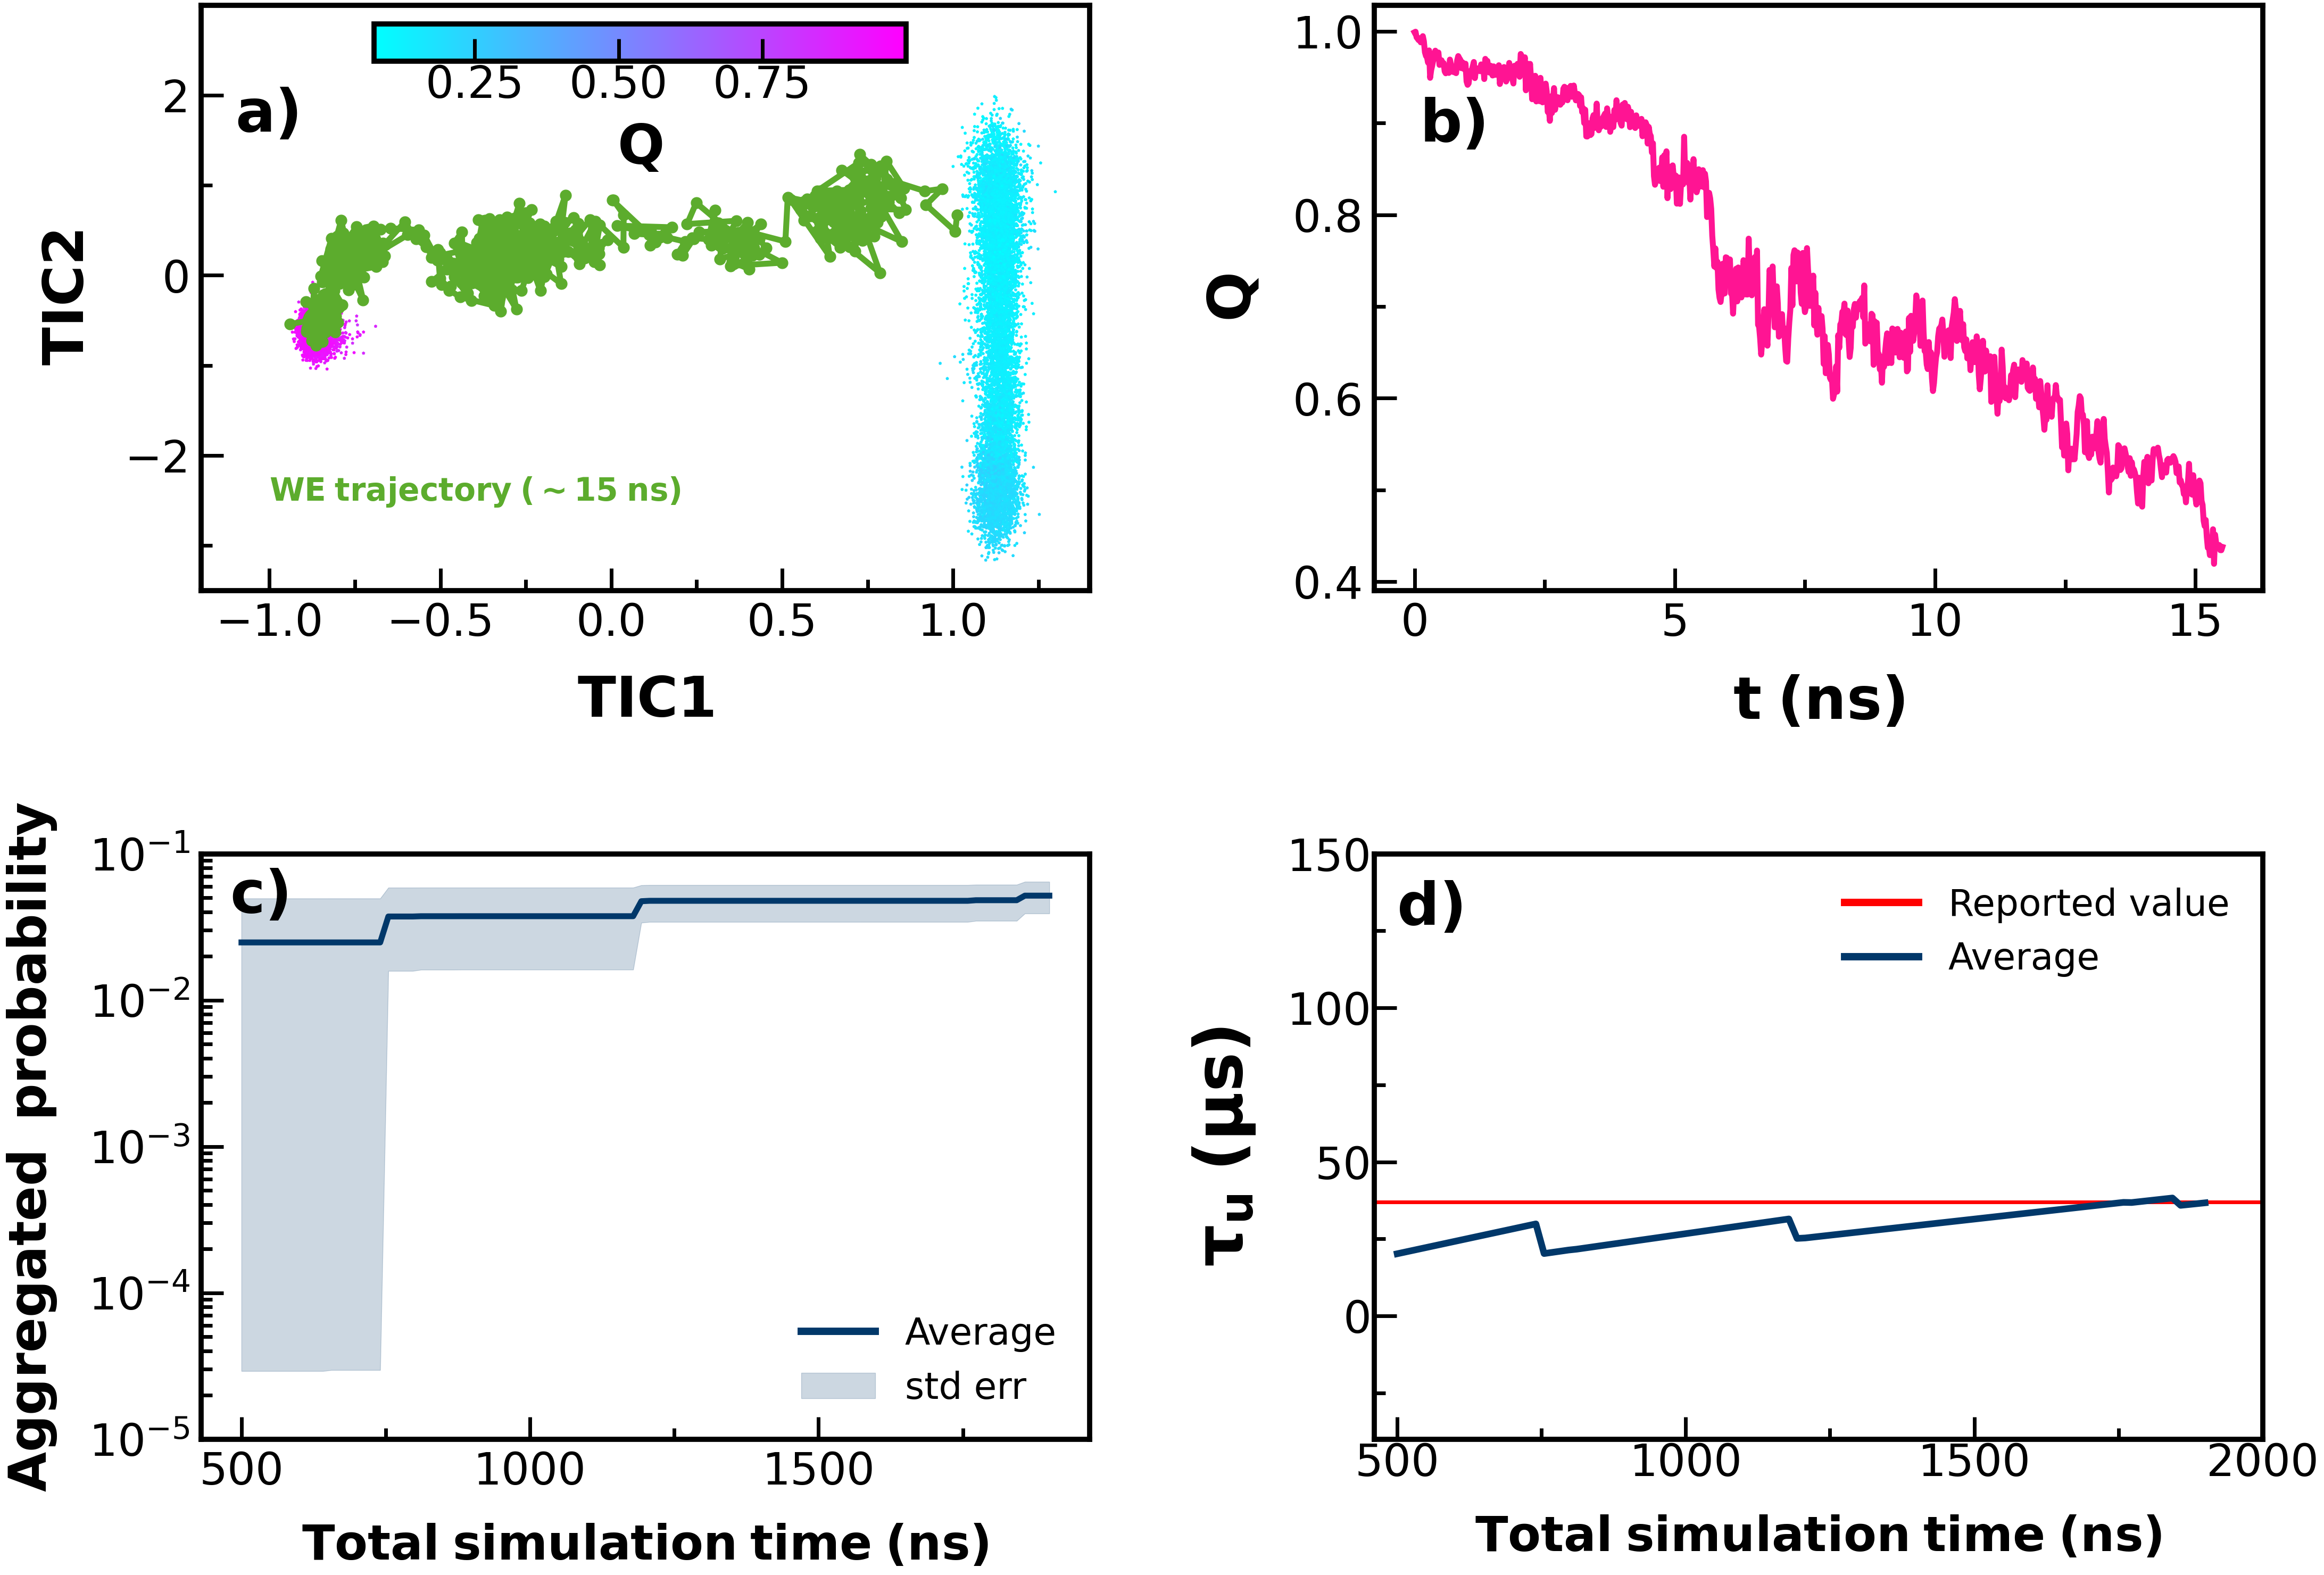

In [4]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 7.0
plt.rcParams['xtick.labelsize'] = 60
plt.rcParams['ytick.labelsize'] = 60
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 30
plt.rcParams['ytick.major.size'] = 30
plt.rcParams['xtick.major.width'] = 5
plt.rcParams['ytick.major.width'] = 5
plt.rcParams['xtick.minor.size'] = 15
plt.rcParams['ytick.minor.size'] = 15
plt.rcParams['xtick.minor.width'] = 5
plt.rcParams['ytick.minor.width'] = 5
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['legend.fontsize'] = 50
plt.rcParams['legend.frameon'] = False

fig, ax = plt.subplots(2,2,figsize=(50, 35))
fig.subplots_adjust(wspace=0.32, hspace=0.45)

# Figure-1
im = ax[0,0].scatter(df_ic_MD['TIC1'], df_ic_MD['TIC2'], c=df_Q_MD['Q'], marker='p', s=13, cmap='cool', alpha=1.0)
cbaxes = fig.add_axes([0.19, 0.85, 0.2, 0.02]) 
cbr = fig.colorbar(im, ax=ax[0,0], orientation='horizontal', cax=cbaxes)
cbr.set_label(r'$\mathbf{Q}$', labelpad=20, fontsize=75)
for t in cbr.ax.get_yticklabels():
     t.set_fontsize(65)
cbr.minorticks_off()
ax[0,0].plot(df_ic_WE['TIC1'], df_ic_WE['TIC2'], '-o', ms=15, lw=8, c='#5cac2d')
ax[0,0].set_xlabel(r'$\mathbf{TIC1}$', fontsize=76, labelpad=40)
ax[0,0].set_ylabel(r'$\mathbf{TIC2}$', fontsize=76, labelpad=40)
ax[0,0].set_xlim(-1.2, 1.4)
ax[0,0].set_ylim(-3.5, 3)
ax[0,0].tick_params(pad=15)
ax[0,0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,0].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,0].text(-1.0, -2.5, r'$\mathbf{WE\;trajectory\;(\sim 15\;ns)}$', fontsize=43, color='#5cac2d')



# Figure-2
ax[0,1].plot(df_Q_WE['time(ps)']/1000, df_Q_WE['Q'], lw=8, c='deeppink')
ax[0,1].set_xlabel(r'$\mathbf{t\;(ns)}$', labelpad=40, fontsize=80)
ax[0,1].set_ylabel(r'$\mathbf{Q}$', labelpad=40, fontsize=80)
ax[0,1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
#ax[0,1].xaxis.set_ticks_position('both')
#ax[0,1].yaxis.set_ticks_position('both')
ax[0,1].tick_params(pad=15)



# Figure-3
ax[1,0].plot(df_final['time(ns)'], df_final['probability'], lw=8, color='#01386a', label='Average')
ax[1,0].fill_between(df_final['time(ns)'], df_final['probability'] - df_final['std err'], df_final['probability'] + df_final['std err'], alpha=0.2, color='#01386a', label='std err')
ax[1,0].set_ylabel(r'$\mathbf{Aggregated\;\;probability}$', fontsize=70, labelpad=40)
ax[1,0].set_xlabel(r'$\mathbf{Total\;simulation\;time\;(ns)}$', fontsize=65, labelpad=40)
ax[1,0].set_yscale("log")
ax[1,0].set_ylim(10**(-5), 10**(-1))
leg = ax[1,0].legend(loc='lower right')
for line in leg.get_lines():
    line.set_linewidth(10.0)
ax[1,0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1,0].tick_params(pad=15)




# Figure-4
ax[1,1].axhline(y = 37, lw=5, color='red', label='Reported value')
ax[1,1].plot(df_final['time(ns)'], df_final['MFPT (micro sec)'], lw=9, color='#01386a', label='Average')
ax[1,1].set_ylabel(r'$\mathbf{\tau_{u}\;(\mu s)}$', fontsize=90, labelpad=40)
ax[1,1].set_xlabel(r'$\mathbf{Total\;simulation\;time\;(ns)}$', fontsize=65, labelpad=40)
ax[1,1].set_ylim(-40,150)
ax[1,1].set_xlim(460,2000)
leg = ax[1,1].legend()
for line in leg.get_lines():
    line.set_linewidth(10.0)
ax[1,1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1,1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

ax[0,0].text(-1.1, 1.6, 'a)', fontweight='bold', fontsize=80)
ax[0,1].text(0.1, 0.88, 'b)', fontweight='bold', fontsize=80)
ax[1,0].text(480, 10**(-1.4), 'c)', fontweight='bold', fontsize=80)
ax[1,1].text(500, 127, 'd)', fontweight='bold', fontsize=80)

#plt.savefig('ProteinG_fig1.png', dpi=500, bbox_inches='tight')

# Unfolding time

In [8]:
df_final['time(ns)'][57]

1306.060606060606

In [11]:
print('Unfolding time :', np.mean(df_final['MFPT (micro sec)'][57:]), '±' , np.std(df_final['MFPT (micro sec)'][57:])/np.sqrt(df_final['MFPT (micro sec)'][57:].shape[0]), 'μs')

Unfolding time : 33.25247257678247 ± 0.4959233561281103 μs


# Distance distribution in folded and unfolded basins

In [12]:
# define folded (Q >= 0.95) and unfolded states (Q <= 0.40)
folded_idxs = [np.where(df_Q_MD['Q'] >=0.80)][0]
unfolded_idxs = [np.where(df_Q_MD['Q'] <=0.40)][0]

In [13]:
folded_idxs[0][::30].shape, unfolded_idxs[0][::9].shape

((334,), (1112,))

In [14]:
IC12 = np.column_stack((df_ic_MD['TIC1'], df_ic_MD['TIC2']))

In [24]:
dist_folded = []
m = 1
for i in folded_idxs[0][::30]:
    for j in folded_idxs[0][::30][m:]:
        dist_folded.append(np.linalg.norm(IC12[i] - IC12[j]))
    m += 1

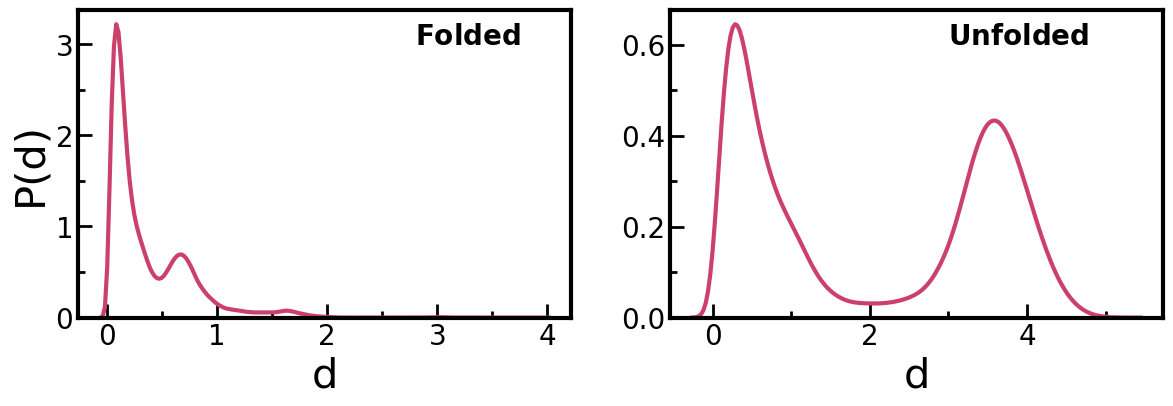

In [27]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3.0
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.frameon'] = False

fig, ax = plt.subplots(1,2,figsize=(14, 4))
sns.kdeplot(dist_folded, color='#cb416b', ax=ax[0], lw=3)
sns.kdeplot(dist_unfolded, color='#cb416b', ax=ax[1], lw=3)
ax[0].set_ylabel('P(d)')
ax[1].set_ylabel('')
for i in range(2):
    ax[i].set_xlabel('d')
    ax[i].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

ax[0].text(2.8, 3.0, r'$\mathbf{Folded}$', fontsize=20, color='black')
ax[1].text(3, 0.6, r'$\mathbf{Unfolded}$', fontsize=20, color='black')
plt.savefig('TC5b_fig2.png', dpi=500, bbox_inches='tight')